<a href="https://colab.research.google.com/github/guilherme-ivan/prod_hosp/blob/main/Notebooks/Alura_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as py
resid = pd.read_csv("/content/drive/MyDrive/Moradores.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=5, thousands=".", decimal=",")
pd.options.display.float_format = "{:.2f}".format
resid=resid.set_index("Unidade da Federação", drop=False) #==> define o Index do DataFrame sem dropar a coluna UF
resid.index=resid.index.str.slice(3) #==> retira os 3 primeiros caracteres de todas as linhas do index
resid=resid.rename(columns={'Unidade da Federação':"Região"}) #==> Renomeia a coluna UF em Região
resid["Região"]=resid["Região"].str.slice(stop=1) #==> corta os caracteres de 'Região'
regiao_dict={'1':'Norte', '2':'Nordeste', '3':'Sudeste','4':'Sul','5':'Centro-Oeste'}
resid['Região']=resid['Região'].replace(regiao_dict)
posicao=resid.columns.get_loc('2008')
resid=resid.drop(resid.iloc[:, 1:posicao], axis=1)
posicao=resid.columns.get_loc('2020')
resid=resid.drop(resid.iloc[:, posicao:], axis=1)
old_idx=resid.index.to_frame()
old_idx.insert(1, 'Região', resid['Região'])
resid.index=pd.MultiIndex.from_frame(old_idx)
resid=resid.drop('Região', axis=1)
resid

<ipython-input-1-8b58fe253ca9>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  resid = pd.read_csv("/content/drive/MyDrive/Moradores.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=5, thousands=".", decimal=",")


,,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,Região,,,,,,,,,,,,
Rondônia,Norte,1566588,1582874,1598634,1618210,1637884,1657620,1677766,1698263,1717911,1737578,1757589,1777225
Acre,Norte,730523,748586,765325,778499,792045,805014,818273,831665,844137,856457,869265,881935
Amazonas,Norte,3415112,3485174,3553148,3618040,3684326,3751293,3819636,3887740,3952171,4015812,4080611,4144597
Roraima,Norte,433189,446088,458820,469543,480290,491066,501970,513328,525967,546885,576568,605761
Pará,Norte,7504065,7637004,7762953,7862943,7960134,8054419,8149418,8244575,8334346,8422634,8513497,8602865
Amapá,Norte,654211,674343,694261,711453,728015,744809,762156,779416,796419,813084,829494,845731
Tocantins,Norte,1370924,1392316,1412989,1431478,1449779,1467474,1485318,1503482,1520448,1537350,1555229,1572866
Maranhão,Nordeste,6561681,6639032,6710964,6757213,6798830,6836179,6875302,6916244,6955099,6994148,7035055,7075181
Piauí,Nordeste,3153990,3174367,3193395,3203635,3213393,3221407,3229320,3238459,3246999,3255400,3264531,3273227


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Este bloco importa os dados de produção hospitalar do tipo "Ano/Mês Atendimento" extraídos do TabNet, modela o DataFrame para melhor entendimento, e recorta os
import pandas as pd
import numpy as py
atend = pd.read_csv("/content/drive/MyDrive/TABNET_atendimento.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12, thousands=".", decimal=",")
pd.options.display.float_format = "{:.2f}".format
atend=atend.drop("Total", axis=1)
atend=atend.set_index("Unidade da Federação", drop=False) #==> define o Index do DataFrame sem dropar a coluna UF
atend.index=atend.index.str.slice(3) #==> retira os 3 primeiros caracteres de todas as linhas do index
atend=atend.rename(columns={'Unidade da Federação':"Região"}) #==> Renomeia a coluna UF em Região
atend["Região"]=atend["Região"].str.slice(stop=1) #==> corta os caracteres de 'Região'
regiao_dict={'1':'Norte', '2':'Nordeste', '3':'Sudeste','4':'Sul','5':'Centro-Oeste'}
atend['Região']=atend['Região'].replace(regiao_dict)
posicao=atend.columns.get_loc("2008/Jan")
atend=atend.drop(atend.iloc[:, 1:posicao], axis=1)
posicao=atend.columns.get_loc("2020/Jan")
atend=atend.drop(atend.iloc[:, posicao:], axis=1)
old_idx=atend.index.to_frame()
old_idx.insert(1, 'Região', atend['Região'])
atend.index=pd.MultiIndex.from_frame(old_idx)
atend=atend.drop('Região', axis=1)
atend.columns=atend.columns.str.slice(stop=4)
atend_bkp=atend
atend.head()

<ipython-input-81-c52be635a5cb>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  atend = pd.read_csv("/content/drive/MyDrive/TABNET_atendimento.csv", encoding="ISO-8859-1", sep=";", skiprows=3, skipfooter=12, thousands=".", decimal=",")


,,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
Unidade da Federação,Região,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,...,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05
Acre,Norte,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,...,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09
Amazonas,Norte,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,...,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90
Roraima,Norte,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,...,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87
Pará,Norte,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,23502915.90,22544291.26,23259148.28,23667690.01,23352577.75,...,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36792954.02,36982129.33,35579251.49,35213275.04


In [ ]:
soma_ano=por_ano.groupby(level=0, axis=1).sum() #Este bloco cria um DF "Soma_ANO" para receber os dados de Atendimento SUS, e somar as colunas de mesmo nome (mesmo ano, no caso).
soma_ano.head()

,,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,Região,,,,,,,,,,,,
Rondônia,Norte,29839972.31,44133812.42,53124212.75,53750792.13,52301055.10,66729484.10,82257890.98,88428027.15,91623322.06,96504132.64,102988676.57,106158004.05
Acre,Norte,24480534.65,26010824.00,29424692.81,33344038.83,34119460.43,33784031.38,35828191.77,37212305.04,38899136.05,38481037.98,35003946.70,35575765.00
Amazonas,Norte,102696703.00,106491315.75,114175777.25,120263314.00,122916860.05,124394890.31,125653016.96,151951929.99,148594724.62,161894361.65,178707383.73,188372182.21
Roraima,Norte,11886927.98,16929879.02,21019487.27,19167565.27,20131420.61,20992961.13,21581368.46,24253816.82,27134105.91,31447008.80,33427492.65,34576078.43
Pará,Norte,275035723.55,318534381.79,323475434.21,325157580.12,314077253.65,338360847.83,348668600.11,350527947.62,363094303.10,388200710.98,412284321.03,407995371.72


In [ ]:
real_por_hab=soma_ano/resid #Este bloco cria o DF 'Real por hab', que contém quantos reais foram gastos para cada habitante ao longo dos meses
estados=real_por_hab.reset_index() #aqui separamos Estado e Região para seleção do usuário, e atribuímos um 'ID' a cada estado
estados=estados.iloc[:,0:2]
estados=estados.reset_index(drop=False)
estados['index']=estados['index']+1
estados=estados.rename(columns={'index':'ID'})
estados=estados.set_index('ID')
estados.head()

,Unidade da Federação,Região
ID,,
1,Rondônia,Norte
2,Acre,Norte
3,Amazonas,Norte
4,Roraima,Norte
5,Pará,Norte


In [ ]:
print(estados) #Aqui a gente pega a escolha do usuário para plotar (Gastos x Habitante) do estado escolhido
id_escolhido=int(input('Digite o ID do seu estado: '))
estado_escolhido=estados.loc[id_escolhido, 'Unidade da Federação']
print('Estado escolhido: ', id_escolhido, ' - ', estado_escolhido)


   Unidade da Federação        Região
ID                                   
1              Rondônia         Norte
2                  Acre         Norte
3              Amazonas         Norte
4               Roraima         Norte
5                  Pará         Norte
6                 Amapá         Norte
7             Tocantins         Norte
8              Maranhão      Nordeste
9                 Piauí      Nordeste
10                Ceará      Nordeste
11  Rio Grande do Norte      Nordeste
12              Paraíba      Nordeste
13           Pernambuco      Nordeste
14              Alagoas      Nordeste
15              Sergipe      Nordeste
16                Bahia      Nordeste
17         Minas Gerais       Sudeste
18       Espírito Santo       Sudeste
19       Rio de Janeiro       Sudeste
20            São Paulo       Sudeste
21               Paraná           Sul
22       Santa Catarina           Sul
23    Rio Grande do Sul           Sul
24   Mato Grosso do Sul  Centro-Oeste
25          

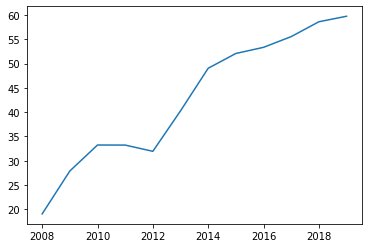

In [ ]:
import matplotlib.pyplot as plt #aqui vou tentar plotar o gráfico do estado escolhido pelo usuário
real_por_hab.iloc[id_escolhido-1].plot(kind='line', rot=0) #carece de validação. Acho que tá trazendo o índice errado
plt.show()